In [2]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills']  = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/home/adenian/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [4]:
help(df.explode)

Help on method explode in module pandas.core.frame:

explode(column: 'IndexLabel', ignore_index: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Transform each element of a list-like to a row, replicating index values.
    
    Parameters
    ----------
    column : IndexLabel
        Column(s) to explode.
        For multiple columns, specify a non-empty list with each element
        be str or tuple, and all specified columns their list-like data
        on same row of the frame must have matching length.
    
        .. versionadded:: 1.3.0
            Multi-column explode
    
    ignore_index : bool, default False
        If True, the resulting index will be labeled 0, 1, …, n - 1.
    
    Returns
    -------
    DataFrame
        Exploded lists to rows of the subset columns;
        index will be duplicated for these rows.
    
    Raises
    ------
    ValueError :
        * If columns of the frame are not unique.
        * If specified columns

In [17]:
df_exploded = df.explode('job_skills')

#df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

skill_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

#df['job_skills'].explode().value_counts().head(10).plot(kind='bar')

type(skill_count)

pandas.core.series.Series

In [19]:
skill_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [21]:
df_skill_count = skill_count.reset_index(name='skill_count')

df_skill_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [22]:
type(df_skill_count)

pandas.core.frame.DataFrame

In [25]:
df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
1374,Senior Data Analyst,apl,1
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
298,Cloud Engineer,haskell,1


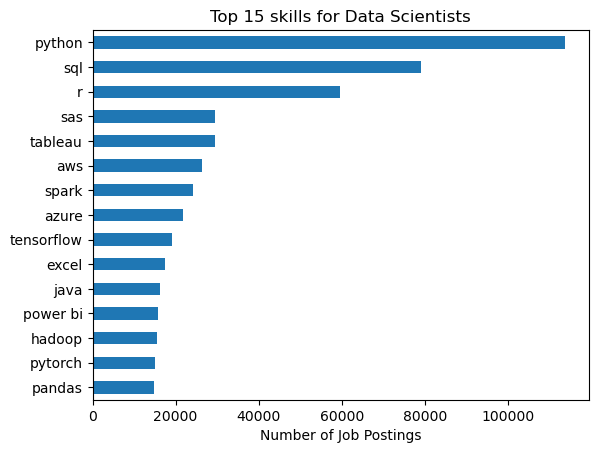

In [46]:
job_title = 'Data Scientist'
top_skills = 15

df_top_skill_DA = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)

df_top_skill_DA.plot(kind='barh', y = 'skill_count', x = 'job_skills')

plt.gca().invert_yaxis()

plt.title(f'Top {top_skills} skills for {job_title}s')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()